# Exercise 7 - Geometric transformations and landmark based registration

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np
import skimage.io as io
from skimage.util import img_as_float, img_as_uint
from skimage.transform import rotate
from skimage.transform import EuclideanTransform
from skimage.transform import SimilarityTransform
from skimage.transform import warp
from skimage.transform import swirl
from skimage.transform import matrix_transform

## Geometric transformations on images

In [2]:
def show_comparison(original, transformed, transformed_name):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original)
    ax1.set_title('Original')
    ax1.axis('off')
    ax2.imshow(transformed)
    ax2.set_title(transformed_name)
    ax2.axis('off')
    io.show()

## Image rotation

#### Exercise 1

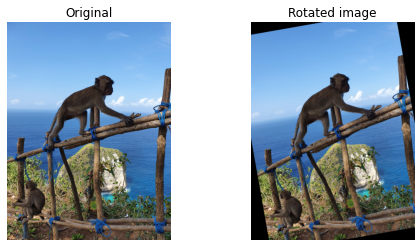

In [3]:
im_org = io.imread('data/NusaPenida.png')

rotation_angle = 10
rotated_img = rotate(im_org, rotation_angle)
show_comparison(im_org, rotated_img, "Rotated image")

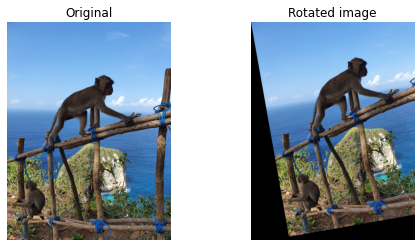

In [4]:
rot_center = [0, 0]
rotated_img = rotate(im_org, rotation_angle, center=rot_center)
show_comparison(im_org, rotated_img, "Rotated image")

#### Exercise 2

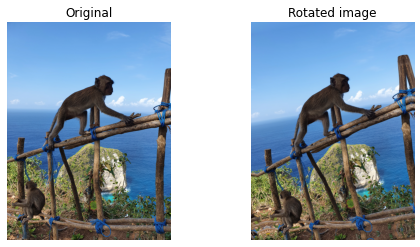

In [5]:
rotated_img = rotate(im_org, rotation_angle, mode="reflect")
show_comparison(im_org, rotated_img, "Rotated image")

#### Exercise 3

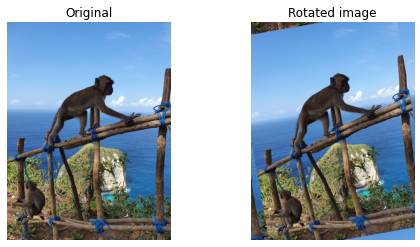

In [6]:
rotated_img = rotate(im_org, rotation_angle, mode="wrap")
show_comparison(im_org, rotated_img, "Rotated image")

#### Exercise 4

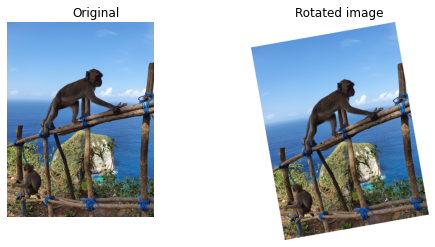

In [7]:
rotated_img = rotate(im_org, rotation_angle, resize=True, mode="constant", cval=1)
show_comparison(im_org, rotated_img, "Rotated image")

#### Exercise 5

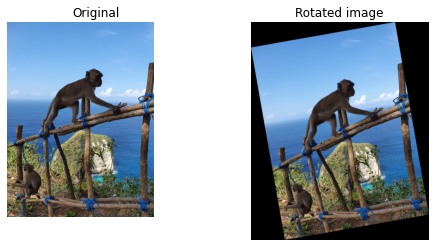

In [8]:
rotated_img = rotate(im_org, rotation_angle, resize=True)
show_comparison(im_org, rotated_img, "Rotated image")

### Euclidean image transformation

#### Exercise 6

In [9]:
# angle in radians - counter clockwise
rotation_angle = 10.0 * math.pi / 180.
trans = [10, 20]
tform = EuclideanTransform(rotation=rotation_angle, translation=trans)
print(tform.params)

[[ 0.98480775 -0.17364818 10.        ]
 [ 0.17364818  0.98480775 20.        ]
 [ 0.          0.          1.        ]]


#### Exercise 7

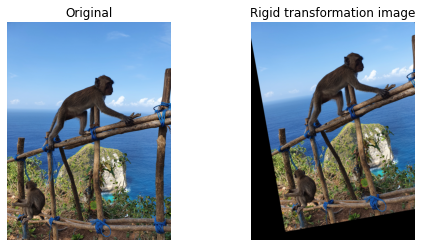

In [10]:
transformed_img = warp(im_org, tform)
show_comparison(im_org, transformed_img, "Rigid transformation image")

### Inverse transformation

#### Exercise 8

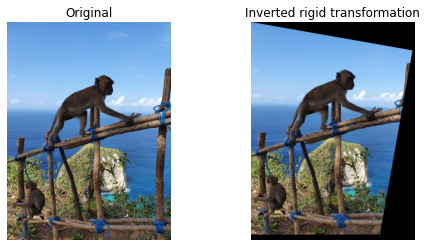

In [11]:
rotation_angle = 10.0 * math.pi / 180.
trans = [0, 0]
tform = EuclideanTransform(rotation=rotation_angle, translation=trans)
transformed_img = warp(transformed_img, tform.inverse)

show_comparison(im_org, transformed_img, "Inverted rigid transformation")

### Similarity transform of image

#### Exercise 9

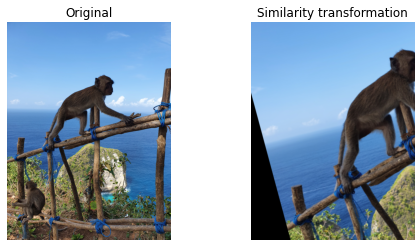

In [12]:
rotation_angle = 15.0 * math.pi / 180.
trans = [40, 30]
scale = 0.6
tform = SimilarityTransform(scale = scale, rotation = rotation_angle, translation = trans)

recovered_img = warp(transformed_img, tform)
show_comparison(im_org, recovered_img, "Similarity transformation")

### The swirl image transformation

#### Exercise 10

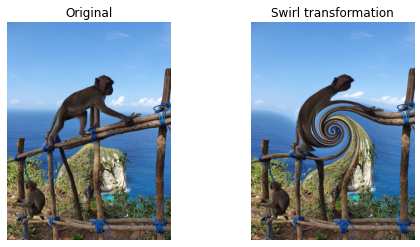

In [13]:
str = 10
rad = 300
swirl_img = swirl(im_org, strength=str, radius=rad)

show_comparison(im_org, swirl_img, 'Swirl transformation')

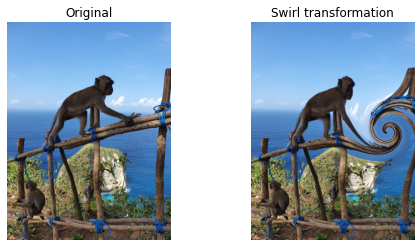

In [14]:
str = 10
rad = 300
c = [500, 400]
swirl_img = swirl(im_org, strength=str, radius=rad, center=c)
show_comparison(im_org, swirl_img, 'Swirl transformation')

## Landmark based registration

#### Exercise 11

In [15]:
src_img = io.imread('data/Hand1.jpg')
dst_img = io.imread('data/Hand2.jpg')

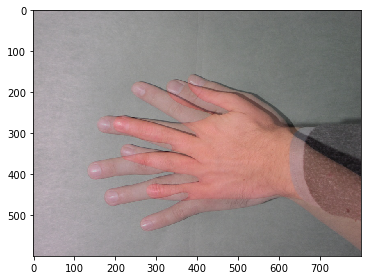

In [16]:
blend = 0.5 * img_as_float(src_img) + 0.5 * img_as_float(dst_img)
io.imshow(blend)
io.show()

### Manual landmark annotation

#### Exercise 12

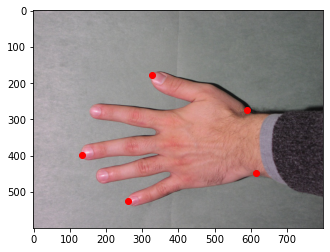

In [17]:
src = np.array([[588, 274], [328, 179], [134, 398], [260, 525], [613, 448]])

plt.imshow(src_img)
plt.plot(src[:, 0], src[:, 1], '.r', markersize=12)
plt.show()

#### Exercise 13

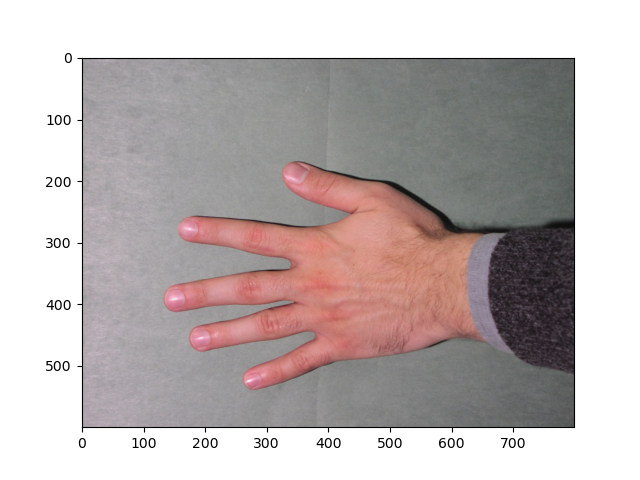

In [18]:
# Change the backend to be able to explore the pixel intensities
# For VSCode Notebooks and JupyterNotebook "%matplotlib widget"
# For Spyder "%matplotlib auto"

%matplotlib widget 
plt.imshow(src_img)
plt.show()

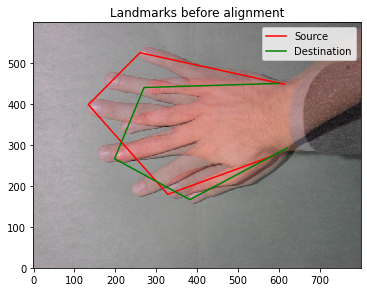

In [19]:
%matplotlib inline 

dst = np.array([[621, 293], [382, 166], [198, 266], [270, 440], [600, 450]])

fig, ax = plt.subplots()
io.imshow(blend)
ax.plot(src[:, 0], src[:, 1], '-r', markersize=12, label="Source")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

#### Exercise 14

In [20]:
e_x = src[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 33553


In [21]:
tform = EuclideanTransform()
tform.estimate(src, dst)

src_transform = matrix_transform(src, tform.params)

#### Exercise 15

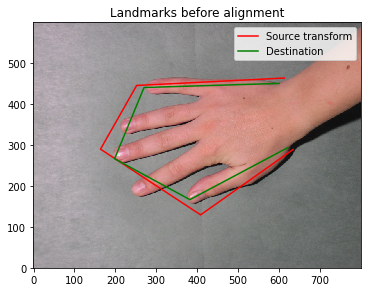

In [22]:
fig, ax = plt.subplots()
io.imshow(dst_img)
ax.plot(src_transform[:, 0], src_transform[:, 1], '-r', markersize=12, label="Source transform")
ax.plot(dst[:, 0], dst[:, 1], '-g', markersize=12, label="Destination")
ax.invert_yaxis()
ax.legend()
ax.set_title("Landmarks before alignment")
plt.show()

In [23]:
e_x = src_transform[:, 0] - dst[:, 0]
error_x = np.dot(e_x, e_x)
e_y = src_transform[:, 1] - dst[:, 1]
error_y = np.dot(e_y, e_y)
f = error_x + error_y
print(f"Landmark alignment error F: {f}")

Landmark alignment error F: 4676.551112578087


#### Exercise 16

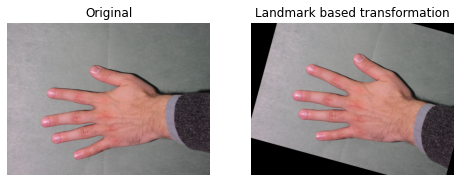

In [24]:
warped = warp(src_img, tform.inverse)
show_comparison(src_img, warped, 'Landmark based transformation')

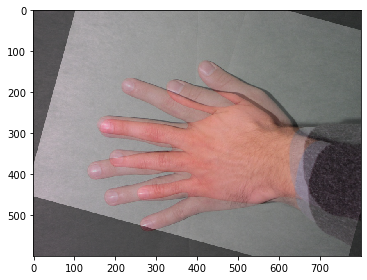

In [25]:
blend = 0.5 * img_as_float(src_img) + 0.5 * img_as_float(warped)
io.imshow(blend)
io.show()

## Video transformations

#### Exercise 16

In [26]:
!python Ex7-VideoImageTransformations.py

Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop


[ WARN:0@11.282] global D:\bld\libopencv_1654062788235\work\modules\videoio\src\cap_msmf.cpp (539) `anonymous-namespace'::SourceReaderCB::~SourceReaderCB terminating async callback


#### Exercise 17

In [27]:
!python Ex7-VideoImageTransformations_solution.py

Starting image capture
Opening connection to camera
Starting camera loop
Stopping image loop


[ WARN:0@9.401] global D:\bld\libopencv_1654062788235\work\modules\videoio\src\cap_msmf.cpp (539) `anonymous-namespace'::SourceReaderCB::~SourceReaderCB terminating async callback
